In this project, I will be covering below steps

# Lifecycle of Exploratory Data Analysis
* Data Collection
* Data Understanding
* Data Loading
* Data Cleaning and Preprocessing
* Data Statistics
* univariate Analysis
* Bivariate Analysis
* Multivariate Analysis
* Summarizing Insights

### Tools Required
* python - pandas,numpy,Matplotlib,seaborn. 
* notebook/ipynb(i python notebook) - vscode/jupyter


### Data Collection
* Data - https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip
* The dataset was collected through the 2023 Stack Overflow Developer Survey, the largest and longest-running survey of developers globally.
* Participation was anonymous, and the survey included various sections such as Basic Information, Education, Work and Career, Technology and Tech Culture, and more.


### Data Understanding
* This dataset is a treasure trove of insights into the global developer community, capturing nearly 90,000 responses. The survey covers a wide range of topics including demographics, education, technology usage, and career preferences, making it a valuable resource for understanding trends in the tech industry

* The 2023 Stack Overflow Developer Survey, conducted using the Qualtrics platform, offers a comprehensive look at the developer community worldwide. Participants contributed anonymously, ensuring privacy while providing honest and diverse perspectives. This survey's data helps us explore various facets of developers' professional and personal lives, from their educational backgrounds to the technologies they use daily. The broad scope of this survey allows for a detailed analysis that can inform decisions in tech industries and beyond.

In [30]:
#installing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

#### Loading dataset in DataFrame

In [31]:
df = pd.read_csv('P:\Data Anaysis\data\Stack-data\survey_results_public.csv')
#schema_df contains detailed information Column/Feature
schema_df = pd.read_csv('P:\Data Anaysis\data\Stack-data\survey_results_schema.csv')

In [32]:
(df.shape,schema_df.shape)

((89184, 84), (78, 6))

In [33]:
#set_option() - allows me to visualize/display the data in max columns (or) controlling the display format
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

 AIACC and AIBen are interchanged we need to change the column name 

# Data Cleaning

In [34]:
na_vals = ['Missing',None,'0',"NA","na"]
df.replace(na_vals,np.nan)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back

In [35]:
df.isnull().sum()

ResponseId                                 0
Q120                                       0
MainBranch                                 0
Age                                        0
Employment                              1286
RemoteWork                             15374
CodingActivities                       15420
EdLevel                                 1211
LearnCode                               1521
LearnCodeOnline                        19100
LearnCodeCoursesCert                   52108
YearsCode                               1749
YearsCodePro                           23048
DevType                                12312
OrgSize                                24141
PurchaseInfluence                      24220
TechList                               28333
BuyNewTool                              6175
Country                                 1211
Currency                               23850
CompTotal                              40959
LanguageHaveWorkedWith                  2044
LanguageWa

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [37]:
df.head(3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

# Data Cleaning and Preprocessing

In [38]:
selected_servey_column = ['MainBranch','Age','Employment','RemoteWork','CodingActivities','EdLevel','LearnCode',
                          'LearnCodeOnline','YearsCode','YearsCodePro','DevType','Country','CompTotal','LanguageHaveWorkedWith','LanguageWantToWorkWith',
                          'DatabaseHaveWorkedWith','DatabaseWantToWorkWith','PlatformHaveWorkedWith','PlatformWantToWorkWith','WebframeHaveWorkedWith',
                          'WebframeWantToWorkWith','ToolsTechHaveWorkedWith','ToolsTechWantToWorkWith','NEWCollabToolsHaveWorkedWith','NEWCollabToolsWantToWorkWith',
                          'OpSysPersonal use','OpSysProfessional use','AISearchHaveWorkedWith','AISearchWantToWorkWith','AIDevHaveWorkedWith','AIDevWantToWorkWith',
                          'AISelect','AISent','AIAcc','AIBen','AIToolInterested in Using','AIToolCurrently Using','AIToolNot interested in Using','WorkExp','ConvertedCompYearly']


In [39]:
selected_survay_df = df[selected_servey_column]
selected_survay_df.head()

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,Country,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,WorkExp,ConvertedCompYearly
0,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,10.0,285000.0
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,27,23,"Developer, back-end",United States of America,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Other Linux-based,NaN,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,23.0,250000.0
3,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,12,7,"Developer, front-end",United States of America,156000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,Homebrew;npm;Vite;Webpack;Yarn,Homebrew;npm;Vite,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,NaN,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,7.0,156000.0
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,6,4,"Developer, full-stack",Philippines,1320000.0,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Elasticsearch;MongoDB;PostgreSQL;Redis;Supabase,Amazon Web Services (AWS);Firebase;Heroku;Netl...,A

In [40]:
selected_survay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MainBranch                     89184 non-null  object 
 1   Age                            89184 non-null  object 
 2   Employment                     87898 non-null  object 
 3   RemoteWork                     73810 non-null  object 
 4   CodingActivities               73764 non-null  object 
 5   EdLevel                        87973 non-null  object 
 6   LearnCode                      87663 non-null  object 
 7   LearnCodeOnline                70084 non-null  object 
 8   YearsCode                      87435 non-null  object 
 9   YearsCodePro                   66136 non-null  object 
 10  DevType                        76872 non-null  object 
 11  Country                        87973 non-null  object 
 12  CompTotal                      48225 non-null 

In [41]:
selected_survay_df = selected_survay_df.drop(0)

In [42]:
type(selected_survay_df['Age'])

pandas.core.series.Series

Removing str"years old" from a column values

In [43]:
selected_survay_df['Age'] = selected_survay_df['Age'].str.replace('years old','')

catogary vise seperating the age column

In [44]:
survey_age_gruop = selected_survay_df['Age'].value_counts()
survey_age_gruop

Age
25-34                33247
35-44                20532
18-24                17930
45-54                 8334
Under 18              4128
55-64                 3392
65 years or older     1171
Prefer not to say      449
Name: count, dtype: int64

In [45]:
cat_mainbrach = selected_survay_df['MainBranch'].value_counts()
cat_mainbrach 

MainBranch
I am a developer by profession                                                           67237
I am not primarily a developer, but I write code sometimes as part of my work/studies     8954
I am learning to code                                                                     4961
I code primarily as a hobby                                                               4960
I used to be a developer by profession, but no longer am                                  1861
None of these                                                                             1210
Name: count, dtype: int64

## Numerical Data Preprocessing

### We have 4 numerical column but it is in 'object' type we need to need that in 'int' type [YearsCode	,YearsCodePro,CompTotal,WorkExp,ConvertedCompYearly]

In [46]:
selected_survay_df[['YearsCode','YearsCodePro','CompTotal','WorkExp','ConvertedCompYearly']].dtypes

YearsCode               object
YearsCodePro            object
CompTotal              float64
WorkExp                float64
ConvertedCompYearly    float64
dtype: object

In [47]:
selected_survay_df['YearsCode'].value_counts()

YearsCode
10                    6521
5                     5415
6                     4893
8                     4879
7                     4800
4                     4466
15                    4336
3                     4269
20                    4021
12                    3471
9                     3130
2                     2826
25                    2685
13                    2601
11                    2519
14                    2278
30                    2078
16                    1842
18                    1690
17                    1544
23                    1327
40                    1302
1                     1294
22                    1210
35                    1118
Less than 1 year       968
24                     959
19                     826
21                     761
28                     715
27                     710
26                     706
33                     496
32                     444
38                     428
45                     360
More than 50 years

In [48]:
selected_survay_df['YearsCode'] = selected_survay_df['YearsCode'].str.replace('Less than 1 year','1')
selected_survay_df['YearsCode'] = selected_survay_df['YearsCode'].str.replace('More than 50 years','50')
selected_survay_df['YearsCode']=selected_survay_df['YearsCode'].fillna(0)
selected_survay_df['YearsCode']=selected_survay_df['YearsCode'].astype(int)

In [49]:
selected_survay_df['YearsCodePro'] = selected_survay_df['YearsCodePro'].str.replace('Less than 1 year','1')
selected_survay_df['YearsCodePro'] = selected_survay_df['YearsCodePro'].str.replace('More than 50 years','50')
selected_survay_df['YearsCodePro'] = selected_survay_df['YearsCodePro'].fillna(0)
selected_survay_df['YearsCodePro'] = selected_survay_df['YearsCodePro'].astype(int)
selected_survay_df['YearsCodePro'].value_counts()

YearsCodePro
0     23047
5      4792
10     4594
2      4464
1      4432
3      4378
4      3970
6      3637
7      3509
8      3462
15     2789
12     2398
20     2227
9      2145
11     2013
13     1690
25     1449
16     1278
14     1256
18     1212
17     1146
23     1112
30      924
22      845
24      686
19      649
21      565
27      490
26      486
35      462
28      417
40      329
32      293
33      264
29      217
36      200
31      187
34      177
38      164
37      150
50      107
45      102
39       99
42       81
41       79
43       67
44       42
46       33
48       30
47       24
49       14
Name: count, dtype: int64

In [50]:
selected_survay_df.describe()

,YearsCode,YearsCodePro,CompTotal,WorkExp,ConvertedCompYearly
count,89183.000000,89183.000000,4.822500e+04,43579.000000,4.801900e+04
mean,13.699999,8.353812,1.036807e+42,11.405126,1.031101e+05
std,10.599656,9.336349,2.276847e+44,9.051989,6.814188e+05
min,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00
25%,6.000000,0.000000,6.300000e+04,5.000000,4.390700e+04
50%,10.000000,5.000000,1.150000e+05,9.000000,7.496300e+04
75%,20.000000,13.000000,2.300000e+05,16.000000,1.216410e+05
max,50.000000,50.000000,5.000000e+46,50.000000,7.435143e+07


### Univariant Analysis

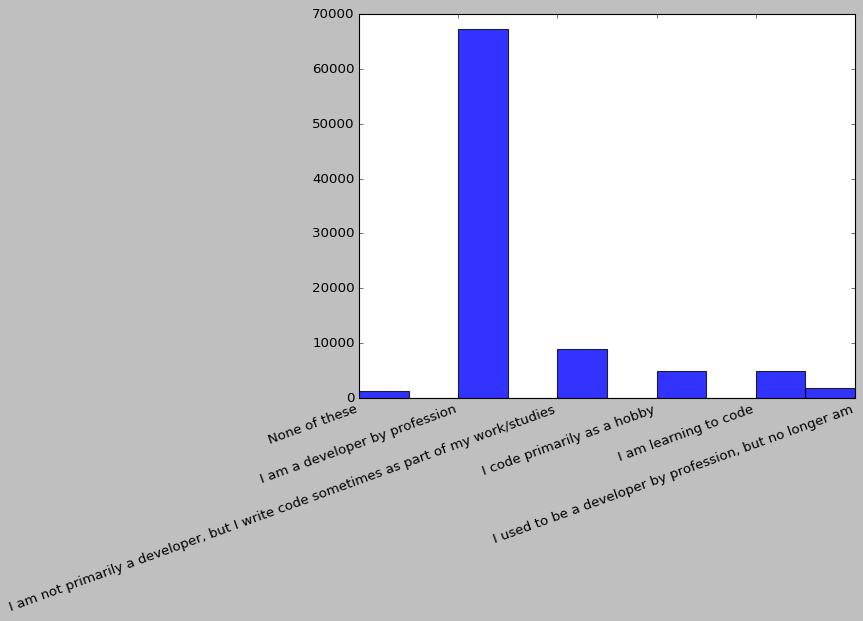

In [51]:
plt.hist(df['MainBranch'],label='hi',bins=10,alpha=0.8)
plt.xticks(rotation=20, ha='right')
plt.show()

In [52]:
remotework_df = selected_survay_df['RemoteWork'].value_counts().reset_index()
remotework_df 

,RemoteWork,count
0,"Hybrid (some remote, some in-person)",31131
1,Remote,30566
2,In-person,12113


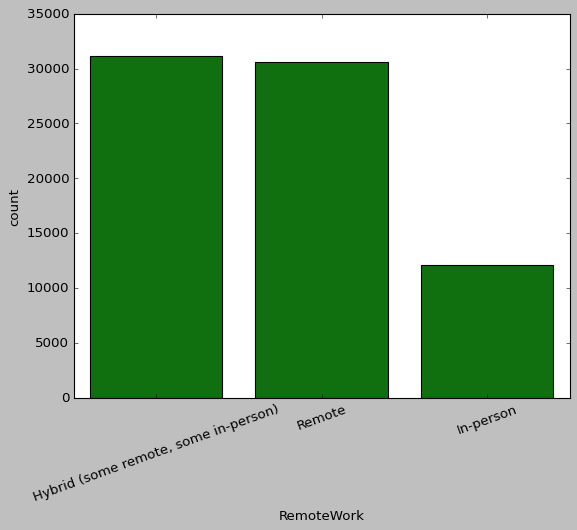

In [53]:
sns.barplot(x=remotework_df['RemoteWork'],y=remotework_df['count'],color='g')
plt.xticks(rotation=20)
plt.style.use('classic')
plt.show()

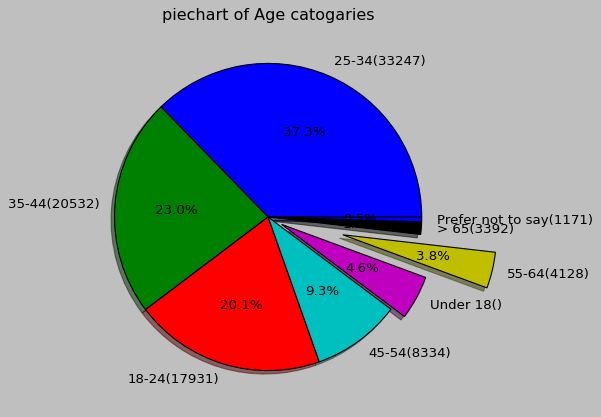

In [54]:
labels = ['25-34(33247)','35-44(20532)','18-24(17931)','45-54(8334)','Under 18()','55-64(4128)','> 65(3392)','Prefer not to say(1171)']
plt.subplot()
plt.pie(survey_age_gruop,labels=labels,explode=(0,0,0,0,0.1,0.5,0,0),autopct='%1.1f%%',shadow=True)
plt.title('piechart of Age catogaries')
plt.style.available
plt.show()

In [55]:
selected_survay_df.head(3)

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,Country,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,WorkExp,ConvertedCompYearly
1,I am a developer by profession,25-34,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,10.0,285000.0
2,I am a developer by profession,45-54,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,27,23,"Developer, back-end",United States of America,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Other Linux-based,NaN,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,23.0,250000.0
3,I am a developer by profession,25-34,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,12,7,"Developer, front-end",United States of America,156000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,Homebrew;npm;Vite;Webpack;Yarn,Homebrew;npm;Vite,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,NaN,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,7.0,156000.0


In [56]:
country_index = selected_survay_df['Country'].value_counts().reset_index()

In [57]:

fig = px.line(x=country_index['Country'].iloc[:10],y=country_index['count'].iloc[:10],labels={'x':'country','y':'count'})
fig.update_layout(title="Top Ten Highest")
fig.show()

In [58]:
selected_survay_df.head(3)

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,Country,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,WorkExp,ConvertedCompYearly
1,I am a developer by profession,25-34,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,10.0,285000.0
2,I am a developer by profession,45-54,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,27,23,"Developer, back-end",United States of America,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Other Linux-based,NaN,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,23.0,250000.0
3,I am a developer by profession,25-34,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,12,7,"Developer, front-end",United States of America,156000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,Homebrew;npm;Vite;Webpack;Yarn,Homebrew;npm;Vite,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,NaN,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,7.0,156000.0


In [59]:
fig = px.line(selected_survay_df.describe(include='object').iloc[0])
fig.update_layout(title='Total Responces for each columns',xaxis_title='Columns',yaxis_title='count/Responses')
fig.show()


In [60]:
describe_object_df = selected_survay_df.describe(include='object')
describe_object_df

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,DevType,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using
count,89183,89183,87898,73810,73764,87973,87663,70084,76872,87973,87140,80709,73435,60911,63628,51308,66938,56741,77884,68315,85864,76649,86557,78587,56328,46150,25904,19587,87973,61501,38594,61396,32783,36137,21069
unique,6,8,106,3,116,8,790,7940,33,185,32641,29602,11096,10485,5920,4963,15144,14620,33133,27456,21262,13659,3050,2470,323,399,166,233,3,6,60,5,640,533,535
top,I am a developer by profession,25-34,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Formal documentation provided by the owner of ...,"Developer, full-stack",United States of America,HTML/CSS;JavaScript;TypeScript,Rust,PostgreSQL,PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),React,React,Visual Studio Solution,Docker,Visual Studio Code,Visual Studio Code,Windows,Windows,ChatGPT,ChatGPT,GitHub Copilot,GitHub Copilot,Yes,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Learning about a codebase;Project planning;Wri...,Writing code,Collaborating with teammates
freq,67237,33247,53748,31131,15308,36706,4873,1182,25735,18647,1487,1438,4350,4815,9804,7269,2017,1561,1264,1331,8754,10193,17688,15943,32150,21609,17754,13426,39042,29863,6576,24128,1252,6459,2087


In [67]:
fig = px.histogram(data_frame=describe_object_df,x=describe_object_df.iloc[2],y=describe_object_df.iloc[3],color=describe_object_df.iloc[3])
fig.update_layout(xaxis_title = 'Highest Frequency Values',yaxis_title='Frequency Count',xaxis=dict(tickangle=20),title='Highest Values repeated for each column vs Frequency of that values')

In [62]:
selected_survay_df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                                        1487
Python                                                                                                1132
HTML/CSS;JavaScript                                                                                    735
HTML/CSS;JavaScript;PHP;SQL                                                                            718
C#                                                                                                     649
                                                                                                      ... 
Bash/Shell (all shells);C;C#;Java;JavaScript;Perl;PHP;Python;SQL                                         1
Assembly;C;JavaScript;MATLAB;SQL                                                                         1
C#;Crystal                                                                                               1
Bash/Shell (al

some of the values are float , because of missing values so here im replacing with blank string

0
3688748


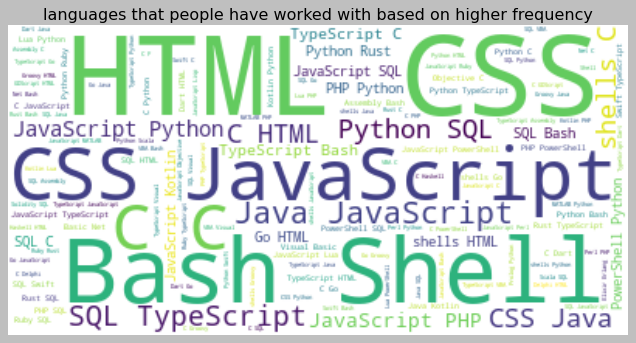

In [63]:
# Removing null values and replacing with empty string
selected_survay_df['LanguageHaveWorkedWith'] = selected_survay_df['LanguageHaveWorkedWith'].fillna('')
print(selected_survay_df['LanguageHaveWorkedWith'].isnull().sum())

# changing from float type to integer type
selected_survay_df['LanguageHaveWorkedWith'] = selected_survay_df['LanguageHaveWorkedWith'].astype(str)

# removing ":" char and joining them into lists
words_list = selected_survay_df['LanguageHaveWorkedWith'].str.split(";")

# then joining all the list into one paragraph to perform visualization of wordcloud
sentences = []
for word in words_list:
    sentence = ' '.join(word)
    sentences.append(sentence)

text = ' '.join(sentences)
print(len(text))

wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10,30))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('languages that people have worked with based on higher frequency')
plt.show()

words = text.split()
count_words = Counter(words)
fig = px.bar(x = count_words.keys(),y = count_words.values(),color=count_words.keys())
fig.update_layout(xaxis_title='Languages people working on',yaxis_title='Count of Each Languages',title='Languages people worked on',xaxis=dict(tickangle=30))


0
2804206


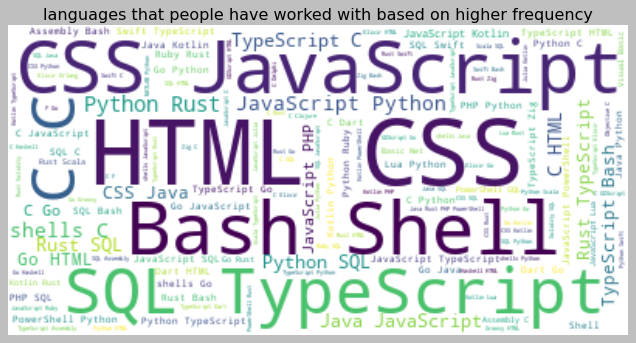

In [64]:
# Removing null values and replacing with empty string
selected_survay_df['LanguageWantToWorkWith'] = selected_survay_df['LanguageWantToWorkWith'].fillna('')
print(selected_survay_df['LanguageHaveWorkedWith'].isnull().sum())

# changing from float type to integer type
selected_survay_df['LanguageWantToWorkWith'] = selected_survay_df['LanguageWantToWorkWith'].astype(str)

# removing ":" char and joining them into lists
words_list = selected_survay_df['LanguageWantToWorkWith'].str.split(";")

# then joining all the list into one paragraph to perform visualization of wordcloud
sentences = []
for word in words_list:
    sentence = ' '.join(word)
    sentences.append(sentence)

text = ' '.join(sentences)
print(len(text))

# ploting in graph(wordcloud)
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10,30))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('languages that people have worked with based on higher frequency')
plt.show()

# visualization of languases vs count
words = text.split()
count_words = Counter(words)
fig = px.bar(x = count_words.keys(),y = count_words.values(),color=count_words.values())
fig.update_layout(xaxis_title='Languages people instrested in',yaxis_title='count of each languages',xaxis=dict(tickangle=30),title='People Intrested in')


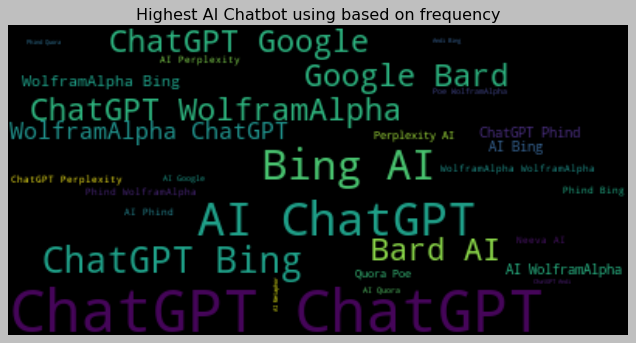

In [65]:
selected_survay_df['AISearchHaveWorkedWith'] = selected_survay_df['AISearchHaveWorkedWith'].fillna(' ')
selected_survay_df['AISearchHaveWorkedWith'] = selected_survay_df['AISearchHaveWorkedWith'].astype(str)
words_lists = selected_survay_df['AISearchHaveWorkedWith'].str.split(';')
sentences = []
for word_list in words_lists:
    sentence = ' '.join(word_list)
    sentences.append(sentence)

paragraph = ' '.join(sentences) # total words in one paragraph
words = paragraph.split() # spliting the paragraph into seperate words
count_words = Counter(words) # counting the words

#displaying the ai chatbot using wordcloud
wordcloud = WordCloud(background_color='black').generate(paragraph)
plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.title('Highest AI Chatbot using based on frequency')
plt.axis('off')

#displaying using plotly

fig = px.bar(count_words.keys(),count_words.values())
fig.update_layout(title='')

In [66]:
selected_survay_df.head()

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,Country,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,WorkExp,ConvertedCompYearly
1,I am a developer by profession,25-34,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,10.0,285000.0
2,I am a developer by profession,45-54,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,27,23,"Developer, back-end",United States of America,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Other Linux-based,,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,23.0,250000.0
3,I am a developer by profession,25-34,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,12,7,"Developer, front-end",United States of America,156000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,Homebrew;npm;Vite;Webpack;Yarn,Homebrew;npm;Vite,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,7.0,156000.0
4,I am a developer by profession,25-34,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,6,4,"Developer, full-stack",Philippines,1320000.0,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Elasticsearch;MongoDB;PostgreSQL;Redis;Supabase,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Amazon Web Services (AWS);Cloudflare;Digital O...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,Docker;npm;Webpack;Yarn,Docker;npm;Yarn,Vim;Visual Studio Code,Vim;Visual Studio Code,O